## Time Series Data
- 우리가 만지는 대부분의 데이터는 시계열 데이터
- "시간"에 특화된 기능이 필요함

### Time seies in Pandas
- 시간에 특화된 Groupby 기능이 필요함 (예 : 데이터중 주말 통계만 필요함)
- Time lag 또는 Moving Average는 계산?
* 예)현재 7시 일때, 3시부터 현재까지의 기온이라든지 하는 그 시간 간의 정보의 차이 
- Pandas에는 이에 특화된 기능을 제공함

### Datetime index
- Python의 Datetime모듈
- 파이썬은 날짜 데이터 처리를 위해 datetime 모듈을 활용

In [28]:
from datetime import datetime
date_str = '2018/09/19'

# 위에서 어떤 형태로 정의하든 아래에서 형식만 잘 맞춰주면 된다.
date_object = datetime.strptime(date_str, '%Y/%m/%d').date()
print(type(date_object))
print(date_object)

<class 'datetime.date'>
2018-09-19


In [29]:
# day만 따로 확인
date_object.day

19

In [30]:
# month만 따로 확인
date_object.month

9

In [31]:
date_str_1 = '180919'
date_str_2 = '180925'

date_object_1 = datetime.strptime(date_str_1, '%y%m%d').date()
date_object_2 = datetime.strptime(date_str_2, '%y%m%d').date()

# delta타입으로 두 날짜간의 차이도 확인가능
date_object_2 - date_object_1

datetime.timedelta(days=6)

In [32]:
# 시간도 확인가능
datetime_str = '09/19/18 13:55:26'
datetime_object = datetime.strptime(datetime_str, '%m/%d/%y %H:%M:%S')

print(type(datetime_object))
print(datetime_object)

<class 'datetime.datetime'>
2018-09-19 13:55:26


#### DateTime Index 만들기
- 대부분의 데이터는 str으로 되어있음
-> 호출 후 DateTime index로 변환이 필요함

In [33]:
import pandas as pd

- 데이터 파일이 txt형식이고 불러들일 때 UnicodeDecodeError가 발생한다면 encoding="cp949", sep="\t" 인자를 줘서 df로 읽을수 있게 불러들인다.
- 거기에 .T로 transpose를 활용하거나 .reset_index()로 인덱스 정리를 활용할 수도 있다

In [34]:
# date열의 데이터들이 양식이 통일안되어있을때, -로 잇고, 공백을 제거하고, 끝에"-01"을 붙이게끔
# 이 함수는 예시일 뿐이고 원할 때 적당히 작성할 줄 알아야됨
# def rename_date(x):
#     return "-".join([value.strip() for value in x[:2]]) + "-01"

In [35]:
df = pd.read_csv("C:/Users/hyun/workspace/TIL/MachineLearning/0_references/bike_demand/train.csv").reset_index()
df.head(3)

,index,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [36]:
# 열 이름 바꾸기
df = df.rename(columns={"index":"인덱스", "datetime": "date", "season": "계절"})
df.head(3)

,인덱스,date,계절,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [37]:
# 위에 정의한 함수대로 date열 형식 통일
# df["date"] = df["date"].str.split(".").map(rename_date)
# df

#### date열의 type 변경

In [38]:
df.dtypes

인덱스             int64
date           object
계절              int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [39]:
pd.to_datetime(df["date"], format='%Y-%m-%d')

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: date, Length: 10886, dtype: datetime64[ns]

In [40]:
# 다른 열의 타입을 변환시켜가며 또 다른 형태로도 의미를 가지는 df만들수 있다.
df["humidity"] = df["humidity"].astype(float)
df["계절"] = df["계절"].astype(float)
df = df.set_index("date")
pd.crosstab(df.index, df["계절"],df["humidity"], aggfunc=sum)


계절,1.0,2.0,3.0,4.0
row_0,,,,
2011-01-01 00:00:00,81.0,NaN,NaN,NaN
2011-01-01 01:00:00,80.0,NaN,NaN,NaN
2011-01-01 02:00:00,80.0,NaN,NaN,NaN
2011-01-01 03:00:00,75.0,NaN,NaN,NaN
2011-01-01 04:00:00,75.0,NaN,NaN,NaN
...,...,...,...,...
2012-12-19 19:00:00,NaN,NaN,NaN,50.0
2012-12-19 20:00:00,NaN,NaN,NaN,57.0
2012-12-19 21:00:00,NaN,NaN,NaN,61.0


### Resampling
- 시간 기준으로 데이터를 Aggregation할 수 있음
- Groupby와 유사 -> 훨씬 간단하고 다양한 기능 제공

#### bike_demand data로 실습해보기

In [41]:
import os

In [42]:
DATA_DIR = "0_references/bike_demand"
TRAIN_PATH = os.path.join(DATA_DIR, "train.csv")

In [52]:
# parse_dates하면 []안의 피쳐의 type이 date로 바뀜
df = pd.read_csv(TRAIN_PATH, parse_dates=["datetime"])
print(df.dtypes)
df.head(3)

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


##### 월별 자전거 수요량 확인

##### 방법1. groupby활용
- 1. df에 datetime을 set_index로 해서 index로 지정한다
- 2. 거기서 df.index.year로 하든 df.index.month로 하든 따로 떼준다.
- 3. groupby로 월별 대여횟수의 합 구해준다

In [53]:
# set_index 한번 하면 바로 할당되니 주석처리 해줬음(반복 실행하면 에러나서)
df = df.set_index("datetime")

# month, year열 생성
df["month"] = df.index.month
df["year"] = df.index.year

# groupby로 대여횟수 sum해서 출력
# 끝에 reset_index해주면 이 데이터만 따로 프레임화 시켜서 핸들링
df.groupby(["year","month"])["count"].sum().reset_index()

,year,month,count
0,2011,1,23552
1,2011,2,32844
2,2011,3,38735
3,2011,4,50517
4,2011,5,79713
5,2011,6,89776
6,2011,7,92848
7,2011,8,83296
8,2011,9,79104
9,2011,10,79522


##### 방법2. (훨씬 간편) resampling활용, 쿼터(분기)별로 확인


<AxesSubplot:xlabel='datetime'>

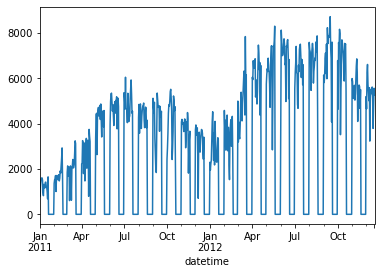

In [ ]:
# resample()안에 "D" : 하루별,  Q : 쿼터별(분기)  W : 주단위  D : 월단위
# https://pandas.pydata.org/docs/user_guide/timeseries.html?highlight=time의 Time/date components부분참고
df["count"].resample("D").sum().plot()

#### Resmapling - Filtering
- somrthing_range 함수로 기간 생성 : Filter 지정 (그 기간의 data만 뽑힘)
- DatetimeIndex,timedelta_range,period_range,interval_range 등등

In [ ]:
# 필터링할 때는 주로 기간을 지정해주는 식
# freq : 얼마의 기간마다 출력할지
period = pd.date_range(start = "2011-01-01", end = "2012-01-30", freq = "M")

# 이렇게도 할 수 있음, period로 필터링하는 횟수 정해버림
# period = pd.date_range(start = "2011-01-01", period = 12,  freq = "M")
df["count"].resample("M").sum()[period]

2011-01-31    23552
2011-02-28    32844
2011-03-31    38735
2011-04-30    50517
2011-05-31    79713
2011-06-30    89776
2011-07-31    92848
2011-08-31    83296
2011-09-30    79104
2011-10-31    79522
2011-11-30    70889
2011-12-31    61183
Freq: M, Name: count, dtype: int64

##### 요일별로 대여횟수의 평균은 ?

<AxesSubplot:xlabel='dayofweek'>

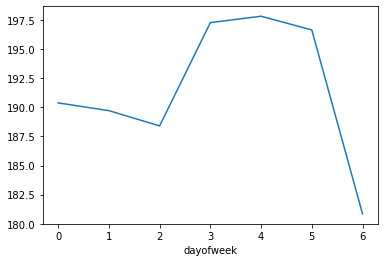

In [ ]:
df["dayofweek"] = df.index.dayofweek
df.groupby("dayofweek")["count"].mean().plot()

#### Time shifting
- 시간의 차(Time Lag)분석 필요
- 예) 30일 전에 비해 주가는 상승세인가 ? (30일 전의 data가 현재에 얼마나 영향을 주는가 ?)
- Pandas내 Time shifting 기능으로 time window를 기준으로 기간간 차이
* time window : 5일, 5분 등 시간의 구간

In [ ]:
montly_avg = df["count"].resample("M").mean()
montly_avg.head(3)

datetime
2011-01-31    54.645012
2011-02-28    73.641256
2011-03-31    86.849776
Freq: M, Name: count, dtype: float64

In [ ]:
# shift라는 함수로 구간 이동
# period=2니까 두칸씩 뒤로 밀어라 라는뜻(1월께 3월결과로 밀림)
montly_avg.shift(periods=2, fill_value=0) 

datetime
2011-01-31      0.000000
2011-02-28      0.000000
2011-03-31     54.645012
2011-04-30     73.641256
2011-05-31     86.849776
2011-06-30    111.026374
2011-07-31    174.809211
2011-08-31    196.877193
2011-09-30    203.614035
2011-10-31    182.666667
2011-11-30    174.622517
2011-12-31    174.773626
2012-01-31    155.458333
2012-02-29    134.173246
2012-03-31    124.353201
2012-04-30    145.646154
2012-05-31    208.276923
2012-06-30    257.455947
2012-07-31    264.109649
2012-08-31    287.186404
2012-09-30    267.037281
2012-10-31    285.570175
2012-11-30    292.598684
2012-12-31    280.508772
Freq: M, Name: count, dtype: float64

In [ ]:
# 기간별 주는 영향을 알고싶을 때 
result = []
montly_avg = df["count"].resample("M").mean()
# 1달~5달 차이까지
for period in range(1,6):
    temp_avg = montly_avg.shift(periods=period, fill_value=0)
    temp_avg = temp_avg.rename("{}_monthly_shift".format(period))
    result.append(temp_avg)

In [ ]:
pd.concat(result, axis=1)

,1_monthly_shift,2_monthly_shift,3_monthly_shift,4_monthly_shift,5_monthly_shift
datetime,,,,,
2011-01-31,0.000000,0.000000,0.000000,0.000000,0.000000
2011-02-28,54.645012,0.000000,0.000000,0.000000,0.000000
2011-03-31,73.641256,54.645012,0.000000,0.000000,0.000000
2011-04-30,86.849776,73.641256,54.645012,0.000000,0.000000
2011-05-31,111.026374,86.849776,73.641256,54.645012,0.000000
2011-06-30,174.809211,111.026374,86.849776,73.641256,54.645012
2011-07-31,196.877193,174.809211,111.026374,86.849776,73.641256
2011-08-31,203.614035,196.877193,174.809211,111.026374,86.849776
2011-09-30,182.666667,203.614035,196.877193,174.809211,111.026374


#### Moving average
- 시계열 데이터는 대부분 노이즈 발생
- 따라서 노이즈를 줄이면서 추세보기, 이동평균법

<AxesSubplot:xlabel='datetime'>

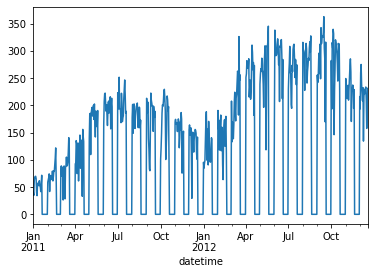

In [ ]:
day_avg = df["count"].resample("D").mean().fillna(0)
day_avg.plot()


##### rolling():
- 테이블에 많은 데이터가 있고 전체에 대한 평균이나 최소 최대값을 알고 싶은 것이 아니라 Window 창이 이동하듯 X축의 창을 이동하면서 Y값의 평균 최소 최대 값을 구할 때

<AxesSubplot:xlabel='datetime'>

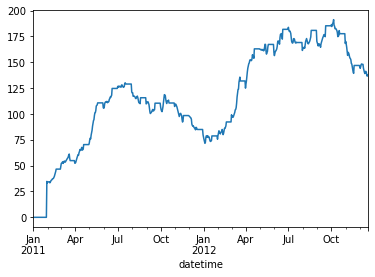

In [ ]:
#  window : 몇일 간격으로 계산할지, 아래의 경우 30일 간의 평균으로 계산
# 계산할 때 data에 NaN 값이 있는것 같으면 fillna로 0으로 대체
day_avg.rolling(window=30).mean().fillna(0).plot()

#훨씬 더 정돈된 형태

<AxesSubplot:xlabel='datetime'>

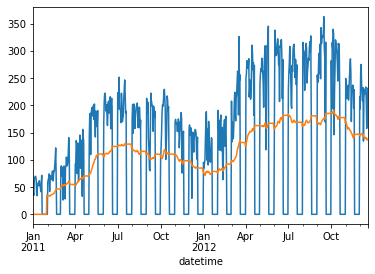

In [ ]:
#같이 보는것도 가능
day_avg.plot()
day_avg.rolling(window=30).mean().fillna(0).plot()


#### Cumsum
- cumulative sum → 누적합
- 시리즈나 데이터프레임의 축을 따라 누적합을 적용한다.

<AxesSubplot:xlabel='datetime'>

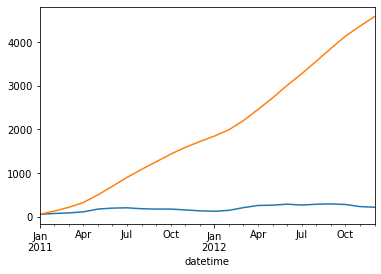

In [ ]:
monthly_avg = df["count"].resample("M").mean()
cumsum_avg = df["count"].resample("M").mean().cumsum()
monthly_avg.plot()
cumsum_avg.plot()

# 단순 resample과 cumsum(누적합)했을 떄의 차이

In [ ]:
monthly_avg = monthly_avg.rename("monthly_avg")
cumsum_avg = cumsum_avg.rename("avg_cumsum")
df_monthly = pd.concat([monthly_avg, cumsum_avg], axis=1)
df_monthly
# concat하여 df형태로 직접비교

,monthly_avg,avg_cumsum
datetime,,
2011-01-31,54.645012,54.645012
2011-02-28,73.641256,128.286267
2011-03-31,86.849776,215.136043
2011-04-30,111.026374,326.162417
2011-05-31,174.809211,500.971627
2011-06-30,196.877193,697.848820
2011-07-31,203.614035,901.462855
2011-08-31,182.666667,1084.129522
2011-09-30,174.622517,1258.752038


<AxesSubplot:>

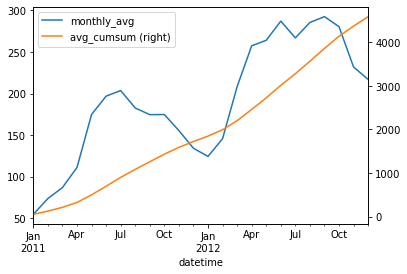

In [ ]:
# secondary_y : y 축 레이블을 보조 y 축에 추가하는 메소드
ax = df_monthly.plot(y = "monthly_avg", use_index = True)
df_monthly.plot(y = "avg_cumsum", secondary_y=True, ax=ax)